<a href="https://colab.research.google.com/github/dsiervo/topnews/blob/master/Author.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U spacy[cuda100]
!pip install scattertext

     |████████████████████████████████| 10.4MB 2.8MB/s 
     |████████████████████████████████| 2.2MB 43.0MB/s 
     |████████████████████████████████| 122kB 52.9MB/s 
     |████████████████████████████████| 3.7MB 49.8MB/s 
     |████████████████████████████████| 382.9MB 37kB/s 
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstalling spacy-2.1.9:
      Successfully uninstalled spacy-2.1.9
     |████████████████████████████████| 6.8MB 2.8MB/s 


In [2]:
!python -m spacy download en

     |████████████████████████████████| 12.0MB 4.0MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp36-none-any.whl size=12011741 sha256=80f0c280d3495835af8395c361421fc7a68b8107aa6c29cb40ceb1617cb89159
  Stored in directory: /tmp/pip-ephem-wheel-cache-v00mknod/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.1.0
    Uninstalling en-core-web-sm-2.1.0:
      Successfully uninstalled en-core-web-sm-2.1.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [3]:
!pip install ktrain

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 245kB 38.5MB/s 
     |████████████████████████████████| 1.8MB 34.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.7.3-cp36-none-any.whl size=113951 sha256=f0874f1c62fb104ec1a823f2b12255ab5bb70a6472c88bbcc9ad5dcbd0ec7fe5
  Stored in directory: /root/.cache/pip/wheels/86/20/70/000142264c6a768a4e8b67d8ef2ebc32c018684acb2eed7586
  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=ccc55e4477c4d3ea8a01edbaa83b7ca69f3afc59eb46a9ac931d155163c6c402
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a30c8fd988bbb48f5ee21b0
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=cb1322156c5a3a0e5b26f074da831a9a1bd88d108985e724a2e9df7216a2a659
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867

In [4]:
import pandas as pd
import scattertext as st
import spacy
import numpy as np
import sklearn as sk
import ktrain
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import matplotlib.pyplot as plt
%matplotlib inline

gpu = spacy.prefer_gpu()
print('GPU:', gpu)
nlp = spacy.load('en', disable=["tagger", "parser", "ner", "textcat"])
nlp.add_pipe(nlp.create_pipe('sentencizer'))

using Keras version: 2.2.4-tf


GPU: True


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
path = '/content/drive/My Drive/News_Category_Dataset_v2.json'

df_ = pd.read_json(path, lines=True)
df_['text'] = df_['headline'] +' '+ df_['short_description']

df = df_.drop(['link', 'date', 'headline', 'short_description'], axis=1)

culture = ['ARTS & CULTURE', 'ARTS', 'CULTURE & ARTS']
worldpost = ['WORLDPOST', 'THE WORLDPOST']
parents = ['PARENTING', 'PARENTS']

df['category'][df['category'].isin(culture)] = "CULTURE"
df['category'][df['category'].isin(worldpost)] = "WORLDPOST"
df['category'][df['category'].isin(parents)] = "PARENTS"

cats = df.category.unique()
def cat_to_num(lab):
  return np.where(cats == lab)[0][0]

df['label'] = df['category'].apply(cat_to_num)

df.head()

,category,authors,text,label
0,CRIME,Melissa Jeltsen,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Andy McDonald,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Ron Dicker,Hugh Grant Marries For The First Time At Age 5...,1
3,ENTERTAINMENT,Ron Dicker,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Ron Dicker,Julianna Margulies Uses Donald Trump Poop Bags...,1


In [7]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df['text'] = df['text'].apply(preprocess_text)

## Top 10 most prolific authors
UNK refers to samples with author's missing field

In [22]:
df['authors'].replace(r'^\s*$', 'UNK', regex=True, inplace=True)
df['authors'].value_counts()[:10]

UNK                  36620
Lee Moran             2423
Ron Dicker            1913
Reuters, Reuters      1562
Ed Mazza              1322
Cole Delbyck          1140
Andy McDonald         1068
Julia Brucculieri     1059
Carly Ledbetter       1054
Curtis M. Wong        1020
Name: authors, dtype: int64

In [85]:
authors = df.groupby(['authors', 'category']).size().reset_index(name='art_count')

authors.head(60)

,authors,category,art_count
0,"Basil Kreimendahl, Contributor\nPlaywright",QUEER VOICES,1
1,"Bill Bigelow, ContributorRethinking Schools c...",POLITICS,1
2,"Bustle, Contributor\nNews, entertainment, lif...",QUEER VOICES,1
3,"Bustle, Contributor\nNews, entertainment, lif...",WEDDINGS,1
4,"Bustle, ContributorNews, entertainment, lifes...",WOMEN,1
5,"Cristian Farias, Elise Foley, and Willa Frej",POLITICS,1
6,"Jamie Walker, ContributorCEO and Founder of S...",HEALTHY LIVING,4
7,"Josh Horwitz, ContributorExecutive Director, ...",POLITICS,2
8,"LINDA NOBLE TOPF, Contributor\nI am a wellnes...",WELLNESS,17
9,"Logan (Mehl-Laituri) Isaac, ContributorAuthor...",RELIGION,1


In [76]:
a = 'adfjk'
a.split('y')[0]

'adfjk'

In [134]:
authors2 = df.groupby(df['authors'].str.split(',').str[0]).agg({'category':pd.Series.nunique}).reset_index()

#authors2 = df.groupby(df['authors'].str.split(',').str[0]).apply(pd.Series.nunique).reset_index()
authors2.sort_values(['category'], ascending=False).head(10).head()

,authors,category
23221,UNK,37
3588,Carla Herreria,36
19804,Ron Dicker,35
20013,Ryan Grenoble,34
6247,Dominique Mosbergen,33


In [136]:
# deleting UNK
authors2.drop([23221], axis=0, inplace =True)

authors2.head()

,authors,category
0,Basil Kreimendahl,1
1,Bill Bigelow,1
2,Bustle,3
3,Cristian Farias,1
4,Jamie Walker,1


In [137]:
authors2.authors.describe()

count            24025
unique           24025
top       Diandra Loux
freq                 1
Name: authors, dtype: object

In [122]:
authors2.category.describe()

count    24025.000000
mean         1.484121
std          1.510621
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         36.000000
Name: category, dtype: float64

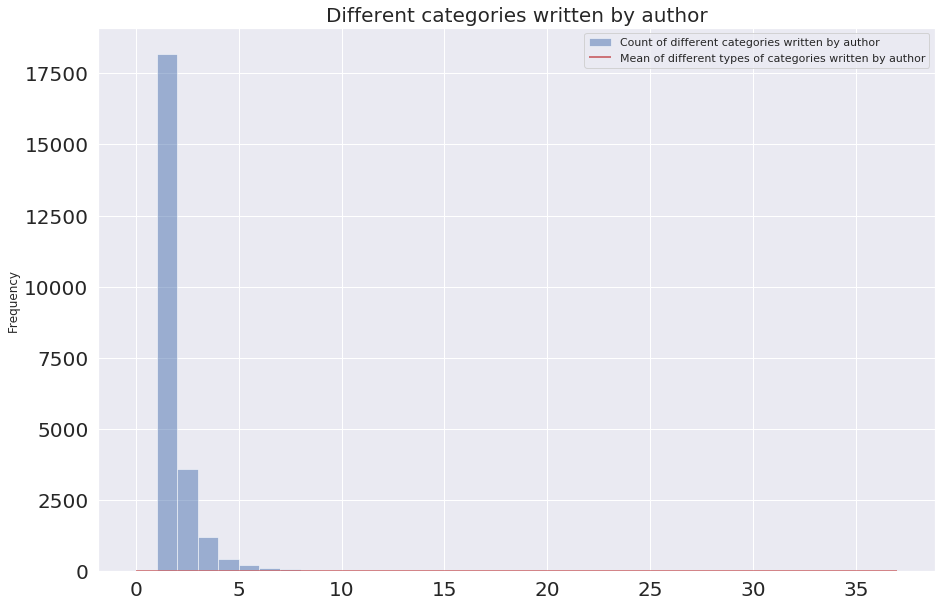

In [140]:
import seaborn as sns
sns.set()
fig = authors2.category.plot(kind='hist', alpha=0.5, figsize=(15,10), label='Count of different categories written by author',
                             bins=range(1,38), fontsize=20)
plt.title('Different categories written by author', fontsize=20)
plt.hlines(authors2.category.mean(), xmin=0, xmax=37, colors='r', label='Mean of different types of categories written by author')
plt.legend()

The vast majority of authors write articles in a single category.

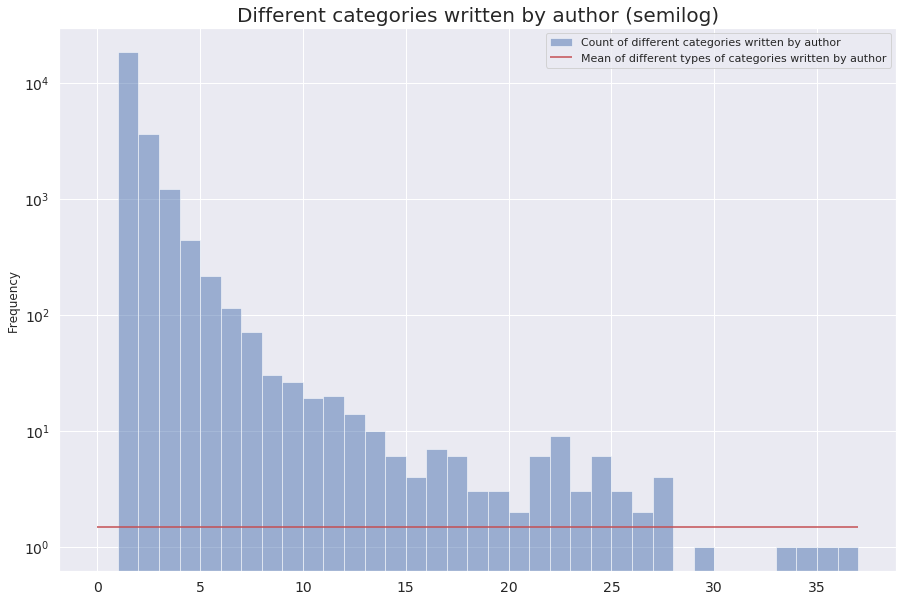

In [139]:
fig = authors2.category.plot(kind='hist', logy=True, alpha=0.5, figsize=(15,10),
                             label='Count of different categories written by author',
                             bins=range(1,38), fontsize=14)
plt.title('Different categories written by author (semilog)', fontsize=20)
plt.hlines(authors2.category.mean(), xmin=0, xmax=37, colors='r', label='Mean of different types of categories written by author')
plt.legend()

### Top 10 authors in politics, science and bussiness




In [54]:
authors[authors['category'] == 'POLITICS'].sort_values(['art_count'], ascending=False).head(10)

,authors,category,art_count
36489,UNK,POLITICS,3535
31738,Sam Levine,POLITICS,865
14295,Igor Bobic,POLITICS,849
8162,Daniel Marans,POLITICS,598
23698,Marina Fang,POLITICS,592
27901,Paige Lavender,POLITICS,549
1520,Amanda Terkel,POLITICS,505
24351,Mary Papenfuss,POLITICS,496
26305,Mollie Reilly,POLITICS,424
2955,Ariel Edwards-Levy,POLITICS,416


In [12]:
authors[authors['category'] == 'SCIENCE'].sort_values(['art_count'], ascending=False).head(10)

,authors,category,art_count
24,UNK,SCIENCE,472
14604,jacqueline howard,SCIENCE,183
22358,macrina cooper white,SCIENCE,86
8568,david freeman,SCIENCE,84
5436,carolyn gregoire,SCIENCE,78
33406,space space,SCIENCE,59
21802,livescience livescience,SCIENCE,54
24254,mazza,SCIENCE,51
6173,chris angelo,SCIENCE,50
26040,moran,SCIENCE,46


In [13]:
authors[authors['category'] == 'BUSINESS'].sort_values(['art_count'], ascending=False).head(10)

,authors,category,art_count
1,UNK,BUSINESS,989
29848,reuters reuters,BUSINESS,294
20465,laura dunn contributorsocial medium communicat...,BUSINESS,180
896,alexander kaufman,BUSINESS,150
10971,emily peck,BUSINESS,121
31044,ryan grenoble,BUSINESS,93
32608,shane ferro,BUSINESS,80
36455,wall wall,BUSINESS,80
13309,harry bradford,BUSINESS,76
16050,jenny,BUSINESS,72


### Let's compare the style of the top 2 politics authors

In [0]:
sty_pol = df.query('authors == "Sam Levine" or authors == "Igor Bobic"')

In [43]:
sty_pol['text'] = sty_pol['text'].apply(preprocess_text)
sty_pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 116 to 123474
Data columns (total 4 columns):
category    1759 non-null object
authors     1759 non-null object
text        1759 non-null object
label       1759 non-null int64
dtypes: int64(1), object(3)
memory usage: 68.7+ KB


In [44]:
%time sty_pol['parsed'] = sty_pol.text.apply(nlp)
sty_pol.head()

CPU times: user 217 ms, sys: 0 ns, total: 217 ms
Wall time: 218 ms


,category,authors,text,label,parsed
116,POLITICS,Sam Levine,alabama exclude undocumented immigrant census ...,4,"(alabama, exclude, undocumented, immigrant, ce..."
180,POLITICS,Sam Levine,aclu suing strike ohio congressional civil lib...,4,"(aclu, suing, strike, ohio, congressional, civ..."
192,POLITICS,Igor Bobic,democrat push included classified briefing inf...,4,"(democrat, push, included, classified, briefin..."
200,POLITICS,Igor Bobic,arizona congressional candidate compare aborti...,4,"(arizona, congressional, candidate, compare, a..."
231,POLITICS,Sam Levine,head still somehow unaware intel russia interf...,4,"(head, still, somehow, unaware, intel, russia,..."


#### Creando corpus

In [0]:
corpus = st.CorpusFromParsedDocuments(sty_pol, category_col='authors', parsed_col='parsed').build()

In [46]:
html = st.produce_scattertext_explorer(corpus,
                                       category='Sam Levine',
                                       category_name='Sam Levine',
                                       not_category_name='Igor Bobic',
                                       minimum_term_frequency=10,
                                       width_in_pixels=1000,
                                       transform=st.Scalers.log_scale_standardize)
file_name = 'Authors_Politics_ScattertextLog_1000.html'
open(file_name, 'wb').write(html.encode('utf-8'))
HTML(html)

Sam Levine is more related with fraud, voter and voting words and Igor Bobic is most related with congress senator and nominnee words. Also words like voter and election are frequent in Sam text but dificut to find in Igor's texts instead words like infrastructure, allegation and congress that are common in Igor's texts but very unfrequent in Sam's texts. This have sense taking into account that Sam Leivine covers voting rights and Igore Bobic covers politics and policy in Washington.